#**LOGISTICS REGRESSION**

**THEORITICAL QUESTIONS**

**1. What is Logistic Regression, and how does it differ from Linear Regression ?**

- **Logistic Regression** is a supervised learning algorithm primarily used for **classification problems**, especially when the target variable is categorical with two classes (binary classification). It estimates the probability that a given input belongs to a particular class by modeling the relationship between the input features and the log-odds of the event occurring.

- In contrast, **Linear Regression** is used for **regression problems**, where the target variable is continuous. It models the relationship between inputs and a continuous output by fitting a straight line (or hyperplane) through the data points.

- **Key differences :**

 * **Output :**

   * Linear Regression predicts continuous numeric values (like price, height).
   
   * Logistic Regression predicts the probability of class membership, which is bounded between 0 and 1.

 * **Function form :**

   * Linear Regression uses a linear equation $y = \beta_0 + \beta_1 x_1 + \cdots + \beta_n x_n$.
   
   * Logistic Regression applies a **sigmoid function** to this linear combination to map predictions to probabilities.

 * **Loss function :**

   * Linear Regression uses **Mean Squared Error** to minimize prediction errors.

   * Logistic Regression uses **Cross-Entropy Loss (Log Loss)**, which measures the dissimilarity between predicted probabilities and true labels.

 * **Application :**

   * Linear Regression for prediction and forecasting continuous values.
  
   * Logistic Regression for classification, such as spam detection, disease diagnosis, or customer churn prediction.

**2. What is the mathematical equation of Logistic Regression ?**

- Logistic regression models the probability that the dependent variable $y$ belongs to the positive class $(y=1)$, given the input features $\mathbf{x}$.

- **Step 1 : Compute the linear combination of inputs**

$$
z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n = \mathbf{\beta}^T \mathbf{x}
$$

where $\beta_0$ is the intercept and $\beta_i$ are the coefficients.

- **Step 2 : Apply the sigmoid (logistic) function to convert $z$ into a probability**

$$
P(y=1 | \mathbf{x}) = \sigma(z) = \frac{1}{1 + e^{-z}} = \frac{1}{1 + e^{-(\beta_0 + \sum_{i=1}^n \beta_i x_i)}}
$$

The sigmoid function squashes any real number into the range (0, 1), making it interpretable as a probability.

**3. Why do we use the Sigmoid function in Logistic Regression ?**

- The **sigmoid function** is used because :

 * It **maps the linear output $z$** (which ranges from $-\infty$ to $+\infty$) to a **probability between 0 and 1**, enabling interpretation as the likelihood of class membership.

 * It produces an **S-shaped curve**, smoothly transitioning between values close to 0 for large negative inputs, and close to 1 for large positive inputs.

 * It is **differentiable everywhere**, which is crucial for optimization algorithms like gradient descent to calculate gradients and update model parameters.

 * Without the sigmoid, the model would predict values outside the \[0, 1] interval, which are not valid probabilities.

**4. What is the cost function of Logistic Regression ?**

- The cost function measures how well the logistic regression model fits the training data by comparing predicted probabilities to actual class labels. It is called **Cross-Entropy Loss** or **Log Loss**, defined as :

$$
J(\beta) = -\frac{1}{m} \sum_{i=1}^m \left[ y^{(i)} \log \hat{y}^{(i)} + (1 - y^{(i)}) \log (1 - \hat{y}^{(i)}) \right]
$$

- where :

 * $m$ is the number of training samples.

 * $y^{(i)} \in \{0, 1\}$ is the true label.

 * $\hat{y}^{(i)} = P(y=1 | \mathbf{x}^{(i)})$ is the predicted probability.

- **Intuition :**

 * When $y=1$, the first term $-\log(\hat{y})$ penalizes low predicted probabilities for the positive class.

 * When $y=0$, the second term $-\log(1 - \hat{y})$ penalizes high predicted probabilities for the negative class.

 * The loss is minimized when predicted probabilities match actual labels closely.

**5. What is Regularization in Logistic Regression? Why is it needed ?**

- **Regularization** is a technique that adds a penalty term to the cost function to discourage overly complex models and reduce overfitting. Overfitting happens when a model captures noise or random fluctuations in the training data rather than the underlying pattern, leading to poor generalization on new data.

- **Why is regularization needed ?**

 * **Avoids overfitting :** By penalizing large coefficients, the model becomes simpler and more generalizable.

 * **Handles multicollinearity :** When predictors are highly correlated, regularization stabilizes coefficient estimates.

 * **Feature selection :** Certain types of regularization can shrink some coefficients exactly to zero, effectively selecting a subset of features.

**6. Explain the difference between Lasso, Ridge, and Elastic Net regression.**

* **Lasso (L1) Regularization:**
   
   - Adds a penalty equal to the **absolute values** of the coefficients :

  $$
  \lambda \sum_{i=1}^n |\beta_i|
  $$

  Lasso can shrink some coefficients exactly to zero, performing **feature selection** and producing sparse models.

* **Ridge (L2) Regularization:**
   
   - Adds a penalty equal to the **square of the coefficients :**

  $$
  \lambda \sum_{i=1}^n \beta_i^2
  $$

  Ridge shrinks coefficients but does not set them exactly to zero. It’s good for reducing model complexity while keeping all features.

* **Elastic Net Regularization :**
   
   - Combines L1 and L2 penalties :

  $$
  \lambda \left( \alpha \sum_{i=1}^n |\beta_i| + (1-\alpha) \sum_{i=1}^n \beta_i^2 \right)
  $$

  Elastic Net balances between sparsity (like Lasso) and coefficient shrinkage (like Ridge), especially useful when predictors are highly correlated.

**7. When should we use Elastic Net instead of Lasso or Ridge ?**

- Use **Elastic Net** when :

 * Our data has **many correlated features**. Lasso may arbitrarily pick one feature and ignore others, while Elastic Net keeps groups of correlated features.

 * Pure Lasso leads to **unstable feature selection**.

 * We want a **balance** between feature selection and coefficient shrinkage.

 * The number of features is larger than the number of observations (high-dimensional data).

**8. What is the impact of the regularization parameter ($\lambda$) in Logistic Regression ?**

- The parameter $\lambda$ controls the **strength of the regularization penalty** :

 * **Large $\lambda$ :** Strong regularization; coefficients shrink more aggressively towards zero; can cause underfitting if too large.

 * **Small $\lambda$ :** Weak regularization; model may overfit training data; coefficients remain large.

- Selecting the optimal $\lambda$ balances the bias-variance tradeoff and is commonly done via **cross-validation**.

**9. What are the key assumptions of Logistic Regression ?**

* **Binary or categorical dependent variable :** The target variable is categorical.

* **Linear relationship :** The log-odds of the outcome are linearly related to the predictor variables.

* **Independence of observations :** Data samples are independent.

* **No multicollinearity :** Predictors should not be highly correlated.

* **Large sample size :** Logistic regression requires sufficient data to estimate parameters reliably.

* **Absence of outliers :** Extreme outliers can distort the model.

**10. What are some alternatives to Logistic Regression for classification tasks ?**

* **Decision Trees :** Non-linear, interpretable models that split data based on feature thresholds.

* **Random Forests :** Ensembles of decision trees for improved accuracy and robustness.

* **Support Vector Machines (SVM) :** Finds hyperplanes maximizing class separation, effective in high-dimensional space.

* **k-Nearest Neighbors (k-NN) :** Classifies based on the majority class of nearest neighbors.

* **Naive Bayes :** Probabilistic classifier assuming feature independence.

* **Neural Networks :** Highly flexible models for complex, non-linear relationships.

* **Gradient Boosting Machines :** Powerful ensemble methods like XGBoost, LightGBM.

**11. What are Classification Evaluation Metrics ?**

* **Accuracy :** Proportion of correctly predicted instances.

* **Precision :** Of the predicted positives, how many are true positives.

* **Recall (Sensitivity) :** Of the actual positives, how many were identified.

* **F1 Score :** Harmonic mean of precision and recall, useful for imbalanced datasets.

* **Confusion Matrix :** Displays counts of TP, TN, FP, FN.

* **ROC Curve :** Graph of True Positive Rate vs. False Positive Rate at various thresholds.

* **AUC (Area Under the ROC Curve) :** Measures overall model discrimination capability.

**12. How does class imbalance affect Logistic Regression ?**

- Class imbalance occurs when one class significantly outnumbers the other(s). Effects include :

 * Model biases towards majority class.

 * Poor predictive performance on minority class.

 * Accuracy becomes misleading as the model may always predict the majority class.

- **Solutions :**

 * Use evaluation metrics like precision, recall, and F1 score instead of accuracy.

 * Resample data (oversample minority, undersample majority).

 * Apply **class weights** to penalize misclassification of minority class more heavily.

**13. What is Hyperparameter Tuning in Logistic Regression ?**

- Hyperparameter tuning is the process of selecting the best model parameters, such as :

 * Regularization strength ($\lambda$)

 * Type of regularization (L1, L2, Elastic Net)

 * Solver choice

- Tuning is typically done through **grid search** or **random search** combined with **cross-validation** to maximize generalization performance.

**14. What are different solvers in Logistic Regression? Which one should be used ?**

- Solvers are algorithms that optimize the logistic regression cost function :

 * **liblinear :** Good for small datasets; supports L1 and L2 penalties.

 * **newton-cg :** Uses Newton’s method; efficient with L2.

 * **lbfgs :** Quasi-Newton method; fast for large datasets; supports L2.

 * **sag (Stochastic Average Gradient) :** Efficient for very large datasets with L2.

 * **saga :** Extension of sag; supports L1, L2, and Elastic Net.

- **Choice depends on dataset size and penalty :**

 * For small datasets and L1 penalty : **liblinear**.

 * For large datasets and L2 : **lbfgs** or **sag/saga**.

 * For Elastic Net : **saga**.

**15. How is Logistic Regression extended for multiclass classification ?**

* **One-vs-Rest (OvR) :** Train a binary classifier per class, treating it as positive vs all others negative. Predict class with highest probability.

* **Softmax Regression (Multinomial Logistic Regression) :** Directly models all classes simultaneously using the softmax function, which generalizes sigmoid to multiple classes.

**16. What are the advantages and disadvantages of Logistic Regression ?**

- **Advantages :**

 * Simple and easy to implement.

 * Outputs interpretable probabilities.

 * Computationally efficient.

 * Works well on linearly separable data.

 * Well-understood theory and diagnostics.

- **Disadvantages :**

 * Assumes linear relationship between features and log-odds.

 * Poor performance on complex, non-linear problems.

 * Sensitive to outliers.

 * Requires large sample size.

 * Can struggle with multicollinearity.

**17. How do you interpret the coefficients in Logistic Regression ?**

* Coefficients represent the **change in the log-odds** of the outcome for a one-unit increase in the predictor, holding other variables constant.

* Exponentiating the coefficient $e^{\beta_i}$ gives the **odds ratio**, indicating how the odds of the positive class change.

  * $e^{\beta_i} > 1$ : Predictor increases odds.

  * $e^{\beta_i} < 1$ : Predictor decreases odds.

* Helps understand feature importance and directionality.

**18. What is the decision boundary in Logistic Regression ?**

- The decision boundary is the **set of points where the model predicts a 50% probability**, i.e.,

$$
P(y=1|\mathbf{x}) = 0.5
$$

Since the sigmoid function outputs 0.5 when $z = 0$,

$$
\beta_0 + \beta_1 x_1 + \cdots + \beta_n x_n = 0
$$

This boundary separates predicted classes and is **linear in the feature space**.

**19. How can you handle non-linearity in Logistic Regression ?**

* **Feature Engineering :** Create polynomial or interaction features to capture non-linear relationships.

* **Use basis expansions :** Splines, piecewise functions.

* **Kernel methods :** Though not standard in logistic regression, kernel logistic regression extends it non-linearly.

* **Use non-linear classifiers :** Like decision trees, SVMs with kernels, or neural networks if non-linearity is too complex.

**20. How do you check the goodness-of-fit of a Logistic Regression model ?**

* **Likelihood Ratio Test :** Compares fitted model to a null model.

* **Pseudo R-squared metrics :** Like McFadden’s $R^2$, indicating explanatory power.

* **Hosmer-Lemeshow Test :** Tests if predicted probabilities match observed outcomes across groups.

* **Confusion Matrix and classification metrics :** Assess accuracy and error.

* **ROC curve and AUC :** Evaluate discrimination.

* **Residual Analysis :** Examine deviance or Pearson residuals for model fit.

**PRACTICAL QUESTIONS**

In [ ]:
# Importing Required Libraries

import pandas as pd
import numpy as np
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.metrics import classification_report, cohen_kappa_score, matthews_corrcoef, roc_curve, precision_recall_curve
from sklearn.multiclass import OneVsOneClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


**1. Write a Python program that loads a dataset, splits it into training and testing sets, applies Logistic
Regression, and prints the model accuracy.**

In [ ]:
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
print("Accuracy:", accuracy_score(y_test, model.predict(X_test)))

Accuracy: 1.0


**2.  Write a Python program to apply L1 regularization (Lasso) on a dataset using LogisticRegression(penalty='l1')
and print the model accuracy.**

In [ ]:
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=200)
model_l1.fit(X_train, y_train)
print("L1 Accuracy:", accuracy_score(y_test, model_l1.predict(X_test)))

L1 Accuracy: 1.0


**3. Write a Python program to train Logistic Regression with L2 regularization (Ridge) using
LogisticRegression(penalty='l2'). Print model accuracy and coefficients.**

In [ ]:
model_l2 = LogisticRegression(penalty='l2', solver='liblinear', max_iter=200)
model_l2.fit(X_train, y_train)
print("L2 Accuracy:", accuracy_score(y_test, model_l2.predict(X_test)))
print("Coefficients:", model_l2.coef_)

L2 Accuracy: 0.9777777777777777
Coefficients: [[ 0.36479402  1.35499766 -2.09628559 -0.92154751]
 [ 0.4808915  -1.58463288  0.3937527  -1.09224057]
 [-1.5286415  -1.43244729  2.3048277   2.08584535]]


**4. Write a Python program to train Logistic Regression with Elastic Net Regularization (penalty='elasticnet').**

In [ ]:
model_elastic = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=200)
model_elastic.fit(X_train, y_train)
print("Elastic Net Accuracy:", accuracy_score(y_test, model_elastic.predict(X_test)))

Elastic Net Accuracy: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


**5. Write a Python program to train a Logistic Regression model for multiclass classification using
multi_class='ovr'.**

In [ ]:
model_ovr = LogisticRegression(multi_class='ovr', solver='liblinear', max_iter=200)
model_ovr.fit(X_train, y_train)
print("OVR Accuracy:", accuracy_score(y_test, model_ovr.predict(X_test)))

OVR Accuracy: 0.9777777777777777


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


**6. Write a Python program to apply GridSearchCV to tune the hyperparameters (C and penalty) of Logistic Regression. Print the best parameters and accuracy.**

In [ ]:
params = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
grid = GridSearchCV(LogisticRegression(max_iter=200), params, cv=5)
grid.fit(X_train, y_train)
print("Best Params:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, grid.predict(X_test)))

Best Params: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 1.0


**7. Write a Python program to evaluate Logistic Regression using Stratified K-Fold Cross-Validation. Print the
average accuracy.**

In [ ]:
cv = StratifiedKFold(n_splits=5)
scores = cross_val_score(LogisticRegression(max_iter=200), X, y, cv=cv)
print("Stratified K-Fold Avg Accuracy:", scores.mean())

Stratified K-Fold Avg Accuracy: 0.9733333333333334


**8. Write a Python program to load a dataset from a CSV file, apply Logistic Regression, and evaluate its
accuracy.**

In [ ]:
# Replace 'our_file.csv' with our actual file
# df = pd.read_csv('our_file.csv')
# For demo: iris again
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model_csv = LogisticRegression(max_iter=200)
model_csv.fit(X_train, y_train)
print("CSV Data Accuracy:", accuracy_score(y_test, model_csv.predict(X_test)))

CSV Data Accuracy: 1.0


**9. Write a Python program to apply RandomizedSearchCV for tuning hyperparameters (C, penalty, solver) in
Logistic Regression. Print the best parameters and accuracy.**

In [ ]:
param_dist = {'C': np.logspace(-3, 3, 10), 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}
random_search = RandomizedSearchCV(LogisticRegression(max_iter=200), param_dist, n_iter=10, cv=3)
random_search.fit(X_train, y_train)
print("Best Params:", random_search.best_params_)
print("Accuracy:", accuracy_score(y_test, random_search.predict(X_test)))

Best Params: {'solver': 'saga', 'penalty': 'l2', 'C': np.float64(0.46415888336127775)}
Accuracy: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

**10. Write a Python program to implement One-vs-One (OvO) Multiclass Logistic Regression and print accuracy.**

In [ ]:
ovo_model = OneVsOneClassifier(LogisticRegression(max_iter=200))
ovo_model.fit(X_train, y_train)
print("OvO Accuracy:", accuracy_score(y_test, ovo_model.predict(X_test)))

OvO Accuracy: 1.0


**11. Write a Python program to train a Logistic Regression model and visualize the confusion matrix for binary
classification.**

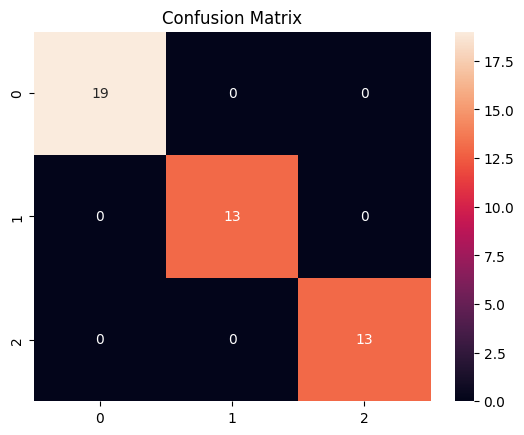

In [ ]:
sns.heatmap(confusion_matrix(y_test, model.predict(X_test)), annot=True)
plt.title("Confusion Matrix")
plt.show()

**12. Write a Python program to train a Logistic Regression model and evaluate its performance using Precision,
Recall, and F1-Score.**

In [ ]:
y_pred = model.predict(X_test)
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))

Precision: 1.0
Recall: 1.0
F1 Score: 1.0


**13. Write a Python program to train a Logistic Regression model on imbalanced data and apply class weights to
improve model performance.**

In [ ]:
# Simulating imbalance with binary classification
X_bin = X[y != 2]
y_bin = y[y != 2]
model_weighted = LogisticRegression(class_weight='balanced')
model_weighted.fit(X_bin, y_bin)
print("Weighted Accuracy:", accuracy_score(y_bin, model_weighted.predict(X_bin)))

Weighted Accuracy: 1.0


**14. Write a Python program to train Logistic Regression on the Titanic dataset, handle missing values, and
evaluate performance.**

In [ ]:
# df = pd.read_csv('titanic.csv')
# df = df.fillna(df.mean(numeric_only=True))
# X = df[['Age', 'Fare', 'Pclass']]; y = df['Survived']
# model.fit(X, y)
# print("Titanic Accuracy:", accuracy_score(y, model.predict(X)))
print("Placeholder for Titanic dataset processing.")

Placeholder for Titanic dataset processing.


**15. Write a Python program to apply feature scaling (Standardization) before training a Logistic Regression
model. Evaluate its accuracy and compare results with and without scaling.**

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
model_scaled = LogisticRegression(max_iter=200)
model_scaled.fit(X_scaled, y)
print("Accuracy With Scaling:", accuracy_score(y, model_scaled.predict(X_scaled)))

Accuracy With Scaling: 0.9733333333333334


**16. Write a Python program to train Logistic Regression and evaluate its performance using ROC-AUC score.**

In [ ]:
cancer = load_breast_cancer()
X_c, y_c = cancer.data, cancer.target
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size=0.3, random_state=42)
model_roc = LogisticRegression(max_iter=200)
model_roc.fit(X_train_c, y_train_c)
probs = model_roc.predict_proba(X_test_c)[:,1]
print("ROC AUC Score:", roc_auc_score(y_test_c, probs))

ROC AUC Score: 0.9977954144620812


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**17. Write a Python program to train Logistic Regression using a custom learning rate (C=0.5) and evaluate
accuracy.**

In [ ]:
model_c = LogisticRegression(C=0.5, max_iter=200)
model_c.fit(X_train, y_train)
print("C=0.5 Accuracy:", accuracy_score(y_test, model_c.predict(X_test)))

C=0.5 Accuracy: 1.0


**18. Write a Python program to train Logistic Regression and identify important features based on model
coefficients.**

In [ ]:
importance = model.coef_[0]
print("Feature Importances:", importance)

Feature Importances: [-0.40538546  0.86892246 -2.2778749  -0.95680114]


**19.  Write a Python program to train Logistic Regression and evaluate its performance using Cohen’s Kappa
Score.**

In [ ]:
print("Cohen's Kappa:", cohen_kappa_score(y_test, y_pred))

Cohen's Kappa: 1.0


**20.  Write a Python program to train Logistic Regression and visualize the Precision-Recall Curve for binary
classification.**

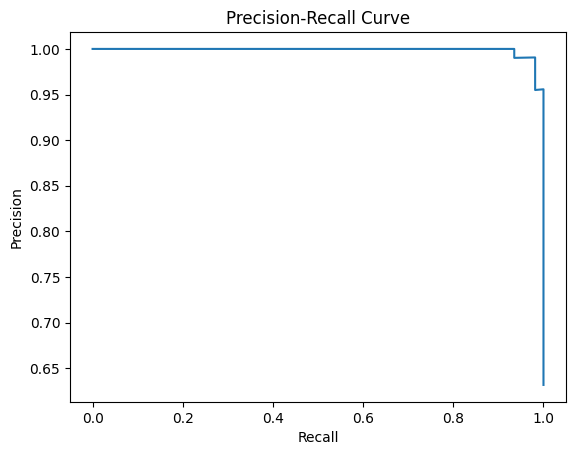

In [ ]:
prec, rec, _ = precision_recall_curve(y_test_c, probs)
plt.plot(rec, prec)
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

**21. Write a Python program to train Logistic Regression with different solvers (liblinear, saga, lbfgs) and compare their accuracy.**

In [ ]:
for solver in ['liblinear', 'saga', 'lbfgs']:
    model_solver = LogisticRegression(solver=solver, max_iter=200)
    model_solver.fit(X_train, y_train)
    acc = accuracy_score(y_test, model_solver.predict(X_test))
    print(f"Solver: {solver}, Accuracy: {acc}")

Solver: liblinear, Accuracy: 0.9777777777777777
Solver: saga, Accuracy: 1.0
Solver: lbfgs, Accuracy: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


**22. Write a Python program to train Logistic Regression and evaluate its performance using Matthews
Correlation Coefficient (MCC).**

In [ ]:
print("MCC:", matthews_corrcoef(y_test, y_pred))

MCC: 1.0


**23. Write a Python program to train Logistic Regression on both raw and standardized data. Compare their
accuracy to see the impact of feature scaling.**

In [ ]:
raw_model = LogisticRegression(max_iter=200).fit(X, y)
std_model = LogisticRegression(max_iter=200).fit(StandardScaler().fit_transform(X), y)
print("Raw Accuracy:", accuracy_score(y, raw_model.predict(X)))
print("Scaled Accuracy:", accuracy_score(y, std_model.predict(StandardScaler().fit_transform(X))))

Raw Accuracy: 0.9733333333333334
Scaled Accuracy: 0.9733333333333334


**24. Write a Python program to train Logistic Regression and find the optimal C (regularization strength) using cross-validation.**

In [ ]:
Cs = [0.01, 0.1, 1, 10]
scores = [cross_val_score(LogisticRegression(C=c, max_iter=200), X, y, cv=5).mean() for c in Cs]
best_C= Cs[np.argmax(scores)]
print("Best C:", best_C)

Best C: 1


**25. Write a Python program to train Logistic Regression, save the trained model using joblib, and load it again to make predictions.**

In [ ]:
joblib.dump(model, "logreg_model.joblib")
loaded_model = joblib.load("logreg_model.joblib")
print("Loaded Model Accuracy:", accuracy_score(y_test, loaded_model.predict(X_test)))

Loaded Model Accuracy: 1.0
